# isotopes
Some examples of what can be done

In [1]:
import isotopes as iso
import matplotlib.pyplot as plt

## Handling molecular formula


In [2]:
mol = "SH (CH2)11 (OCH2CH2)3 OCH2 COOH"
form = iso.parse_formula( mol )    # Check
print("""
Mol: {0}
Formula: {1}
Monoisotopic mass: {2:.6f}
Average mass: {3:.3f}
""".format(mol, form, form.monoisotop(), form.average()))


Mol: SH (CH2)11 (OCH2CH2)3 OCH2 COOH
Formula: C_19 H_38 O_6 S
Monoisotopic mass: 394.238910
Average mass: 394.567



## Handling proteins


Ubiquitin: MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG
parsed as: C_378 H_629 N_105 O_118 S
average mass: 8564.751  monoisotopic mass: 8559.617
Simplified Isotopic pattern:
 8559.616712  4.6418133212
8560.619587  21.3390178771
8561.622386  50.2763050863
8562.625120  80.8019404386
8563.627798  99.5003304976
8564.630429  100.0000000000
8565.633019  85.3378874368
8566.635573  63.5338398123
8567.638099  42.0835916521
8568.640599  25.1717965874
8569.643077  13.7546767329
8570.645538  6.9304852952
8571.647983  3.2446107424
8572.650414  1.4203644179
8573.652835  0.5845106342
8574.655247  0.2271442507
8575.657650  0.0836708516
8576.660042  0.0293037994
8577.662414  0.0097758752
8578.664740  0.0031074821
8579.667039  0.0009428348
8580.669258  0.0002723447
 



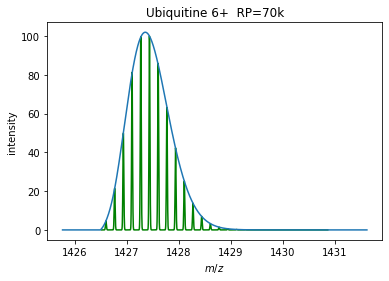

In [3]:
ubi = "MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG" # ubiquitine
form = iso.parse_peptide(ubi)
print("Ubiquitin:", ubi)
print("parsed as:",form)
print ("average mass: %.3f  monoisotopic mass: %.3f"%(form.average(), form.monoisotop()))
D = form.distribution()
print ("Simplified Isotopic pattern:\n",D,"\n")
# draw at Resolving Power = 70k
D.draw(charge=6, RP=70000)
# draw at very low res
D.draw_lowres(charge=6)
plt.title("Ubiquitine 6+  RP=70k");


## molecular arithmetics


In [4]:
form1 = iso.parse_peptide("CCCC")
form2 = iso.parse_peptide("VVAVG")
print("peptide P1: CCCC", form1)
print("peptide P2: VVAVG", form2)
# you can do formula arithmetics
somme = form1 + 2*form2 - 2*iso.parse_formula("H2O")
print("ligation P2-P1-P2 - 2 H2O:", somme)
print ("monoisotopic masses P1: %.3f  P2: %.3f  ligation:: %.3f"%(form1.monoisotop(), form2.monoisotop(), somme.monoisotop()))


peptide P1: CCCC C_12 H_22 N_4 O_5 S_4
peptide P2: VVAVG C_20 H_37 N_5 O_6
ligation P2-P1-P2 - 2 H2O: C_52 H_92 N_14 O_15 S_4
monoisotopic masses P1: 430.047  P2: 443.274  ligation:: 1280.575


##     Not only organic chemistry !


Isotopic distribution for Palladium:
101.905609  3.7321624588
103.904036  40.7610684230
104.905085  81.7050859861
105.903486  100.0000000000
107.903892  96.8166849616
109.905153  42.8832784486

monoisotopic mass of atoms is defined as the most naturally abundant, hence ¹⁰⁶Pd here



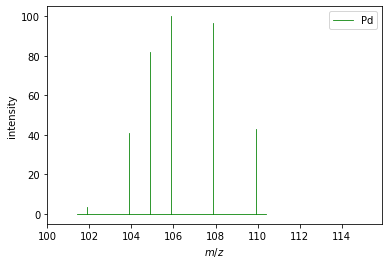

In [5]:
print("Isotopic distribution for Palladium:")
print( iso.parse_formula('Pd').distribution())
alloy = iso.parse("Pd")
alloy.distribution().bar(label="Pd")
plt.legend()
plt.xlim(xmin=100)
print("monoisotopic mass of atoms is defined as the most naturally abundant, hence ¹⁰⁶Pd here\n")


Palladium alloy: Au2 Ca10 Ga10 Pd76
parsed formula Au_2 Ca_10 Ga_10 Pd_76
average mass: 9579.509  monoisotopic mass: 9531.480


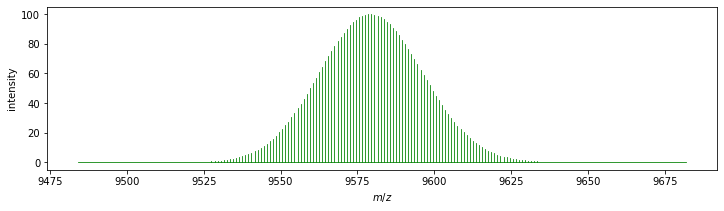

In [6]:
Pdalloy = "Au2 Ca10 Ga10 Pd76"
print("Palladium alloy:", Pdalloy)
alloy = iso.parse(Pdalloy)     # is a short cut for either parse_formula or parse_peptide
print("parsed formula",alloy)
print ("average mass: %.3f  monoisotopic mass: %.3f"%(alloy.average(), alloy.monoisotop()))
plt.figure(figsize=(12,3))
alloy.distribution().bar()

## fine isotopic pattern
test distribution on insuline covalent dimer

*based on the excellent neutronstar program  from https://bitbucket.org/orserang/neutronstar.git* 

In [7]:
# NS contains the location of the neutronstar binary
# should be defined in the configuration part of the code, but can be given on the fly
iso.NS = "./neutronstar/src/neutronstar"

try zooming on peaks


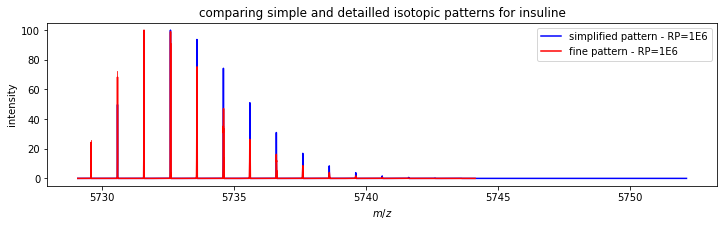

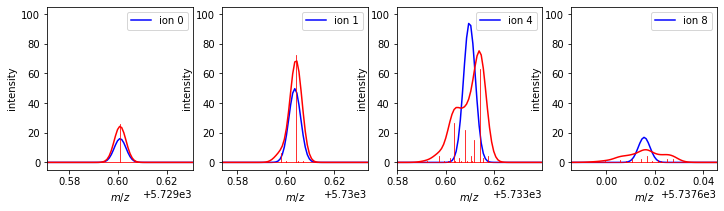

In [8]:
cc = iso.parse_peptide("GIVEQCCASVCSLYQLENYCN")
cd = iso.parse_peptide("FVNQHLCGSHLVEALYLVCGERGFFYTPKA")

insuline = cc + cd - iso.parse_formula("H6")    # remove 6 H for 3 disulfides

D1 = insuline.distribution()
try:
    DD1 = iso.fineisotopicdistrib(insuline)
    ok = True
except:
    print("neutronstar utilities is not installed - check instructions")
    ok = False

if ok:
    # computing with neutronstar is very fast - drawing at high RP is slow !
    plt.figure(1,figsize=(12,3))
    D1.draw(RP=1E6, color='b', label="simplified pattern - RP=1E6")
    DD1.draw(RP=1E6, color='r', label="fine pattern - RP=1E6")
    DD1.bar(color='r')
    plt.legend()
    plt.title("comparing simple and detailled isotopic patterns for insuline")
    plt.figure(2,figsize=(12,3))
    for i,ion in enumerate([0,1,4,8]):
        plt.subplot(1,4,i+1)
        D1.draw(RP=1E6, color='b', label="ion %d"%ion)
        DD1.draw(RP=1E6, color='r')
        DD1.bar(color='r')
        plt.legend()
        plt.xlim(xmin=D1.distrib[ion].mass-0.03, xmax=D1.distrib[ion].mass+0.03)
    print("try zooming on peaks")



## PTM & fragmentation peptides

In [9]:
# let's phosphorylate Ubiquitine on Threonin 12   
phosprot = ubi[:12]+"*"+ubi[12:]
U = iso.parse(ubi)
P = iso.parse(phosprot)
print("""a * indicates a phosphorylation, there are other PTM
here on T12  -  see https://pubmed.ncbi.nlm.nih.gov/33022275/ 
""",phosprot)
print("Average masses: native: %.2f,  phosphorylated: %.2f"%(U.average(), P.average()))
print("difference: %.2f"%(P.average()-U.average()))

a * indicates a phosphorylation, there are other PTM
here on T12  -  see https://pubmed.ncbi.nlm.nih.gov/33022275/ 
 MQIFVKTLTGKT*ITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG
Average masses: native: 8564.75,  phosphorylated: 8644.73
difference: 79.98


In [10]:
# and simulate a tryptic cut at R42
pep = phosprot[:43]
L = len(pep)
# generate a b/y fragmentation at position 11
cut = 11
pep_b = pep[:cut]
pep_y = pep[cut:]
print(" tryptic peptide:",pep)
print(" peptide b11 ", pep_b, "                monoisotopic: ",iso.parse_peptide(pep_b, ends='b').monoisotop())
print(" peptide y32", pep_y, "         monoisotopic: ",iso.parse_peptide(pep_y, starts='y').monoisotop())


 tryptic peptide: MQIFVKTLTGKT*ITLEVEPSDTIENVKAKIQDKEGIPPDQQR
 peptide b11  MQIFVKTLTGK                 monoisotopic:  1247.71858991597
 peptide y32 T*ITLEVEPSDTIENVKAKIQDKEGIPPDQQR          monoisotopic:  3571.7896622554294


## Compare ubiquitine native, and 80% ¹⁵N enriched 


Ubiquitin: MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG
C_378 H_629 N_105 O_118 S
     Isotope(element=7, isotop=14, mass=14.0030740048, abund=0.19999999999999996)
     Isotope(element=7, isotop=15, mass=15.0001088982, abund=0.8)
mass difference = 83.37


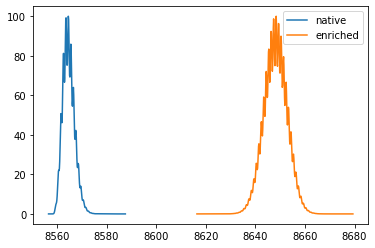

In [11]:
iso.initialize()
form = iso.parse_peptide(ubi)
print("Ubiquitin:", ubi)
print(form)
# native
Dn = form.distribution()
aven = form.average()

# enriched
iso.enrich(element="N",isotop=15, ratio=0.8) #  indicates a 80% 15N enrichment
De = form.distribution()
avee = form.average()

fig, ax = plt.subplots()
mn,yn = Dn.spectrify()
ax.plot(mn,yn, label="native")
me, ye = De.spectrify()
ax.plot(me, ye, label="enriched")
plt.legend()
print("mass difference = %.2f"%(avee-aven))

# enrich() modifies the internal database - so to undo, use iso.initialize() !
iso.initialize()